## Analytics vidya - Credit Card Lead Prediction

#### Importing used libraries

In [1]:
import logging

import pandas as pd
import numpy as np
import xgboost as xgb

from pprint import pprint
from sklearn import metrics
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Configuring logging

In [3]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

INFO:root:test


#### Reading data

In [4]:
submission_data = pd.read_csv("test_mSzZ8RL.csv")
data = pd.read_csv("train_s3TEQDk.csv")

#### Data exploration

In [5]:
data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [6]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
data[["Age","Vintage","Avg_Account_Balance"]].describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000000,245725.000000,2.457250e+05
mean,43.856307,46.959141,1.128403e+06
std,14.828672,32.353136,8.529364e+05
min,23.000000,7.000000,2.079000e+04
25%,30.000000,20.000000,6.043100e+05
50%,43.000000,32.000000,8.946010e+05
75%,54.000000,73.000000,1.366666e+06
max,85.000000,135.000000,1.035201e+07


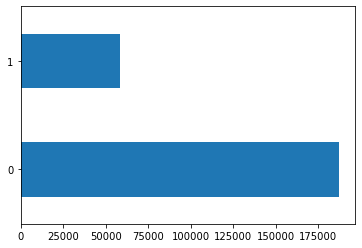

In [8]:
data["Is_Lead"].value_counts().plot.barh()

In [9]:
data.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

#### Data transformations

In [10]:
def data_pipeline(dataset):
    """
    Applies the data transformations to be done on the input dataset
    
    Parameters
    ----------
    dataset: pandas.DataFrane
        input dataset
    
    Returns
    -------
    data: pandas.DataFrame
        pandas dataframe after applying data tranformations on the input data
    """
    data = dataset.copy()
    data.loc[data["Credit_Product"].isnull(), "Credit"] = "Unknown"
    data = pd.get_dummies(data)
    return data
    

In [11]:
train_labels = data.Is_Lead
data = data.drop(columns=["Is_Lead", "ID"])

In [12]:
data = data_pipeline(data)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, train_labels, train_size = .7)

In [14]:
# Setting the model parameters
model_parameters = dict(booster="gbtree",
                        eval_metric='auc',
                        base_score= .2,
                        max_depth=9,
                        eta=0.19,
                        gamma=1,
                        min_child_weight=1,
                        subsample=.35,
                        colsample_bytree=.7,
                        n_estimators=10,
                        scale_pos_weight=.4,
                        reg_alpha=0.1)

In [15]:
xgb_reg = xgb.XGBClassifier(**model_parameters,
                            objective='binary:logistic',
                            enable_categorical = True,
                            verbosity=0,
                            use_label_encoder=False)

#### Training the model

In [16]:
# Taining the model
logging.info('Training Model .. ')
xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train),( x_test,y_test)], verbose=False)

INFO:root:Training Model .. 


XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, enable_categorical=True,
              eta=0.19, eval_metric='auc', gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.189999998, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=0.4, subsample=0.35,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [17]:
# Finding the variables contributing towards the models accuracy
scores = xgb_reg.get_booster().get_score(importance_type="gain")
pprint(sorted(scores.items(),key=lambda x: x[1]))

[('Region_Code_RG258', 0.9047037773333333),
 ('Region_Code_RG275', 1.0859565745),
 ('Region_Code_RG252', 1.22568321),
 ('Region_Code_RG264', 1.22634888),
 ('Region_Code_RG253', 1.36661148),
 ('Region_Code_RG251', 1.440788664),
 ('Region_Code_RG272', 1.4917176730000001),
 ('Region_Code_RG259', 1.4962752198571427),
 ('Region_Code_RG256', 1.55484009),
 ('Region_Code_RG274', 1.6045305238),
 ('Region_Code_RG277', 1.6275662981750003),
 ('Region_Code_RG284', 1.7143884754705883),
 ('Region_Code_RG250', 1.7488880150000001),
 ('Region_Code_RG278', 1.75302887),
 ('Region_Code_RG254', 1.7759899891090911),
 ('Region_Code_RG263', 1.8209781314285713),
 ('Region_Code_RG268', 1.844553373551724),
 ('Region_Code_RG279', 1.925091412),
 ('Region_Code_RG276', 1.9640019733333334),
 ('Region_Code_RG266', 1.9655418399999998),
 ('Region_Code_RG261', 1.9795155519999998),
 ('Region_Code_RG280', 1.9979266008461538),
 ('Region_Code_RG255', 2.0004188233333333),
 ('Region_Code_RG260', 2.06897545),
 ('Avg_Account_Bala

#### Assesing accuracy metrics

In [18]:
# making predictions on the train dataset using the model
train_predictions = xgb_reg.predict(x_train)
train_predprob = xgb_reg.predict_proba(x_train)[:, 1]

In [19]:
# Assesing the accuracy and AUC score of the model on train data
logging.info("Model Report : Train Data")
logging.info("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, train_predictions))
logging.info("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, train_predprob))

INFO:root:Model Report : Train Data
INFO:root:Accuracy : 0.8549
INFO:root:AUC Score (Train): 0.876259


In [20]:
# Making prediction on hte test dataset using the model
test_predictions = xgb_reg.predict(x_test)
test_predprob = xgb_reg.predict_proba(x_test)[:, 1]

In [21]:
# Assesing the accuracy and AUC score of the model on test data
logging.info("Model Report : Test Data")
logging.info("Accuracy : %.4g" % metrics.accuracy_score(y_test.values, test_predictions))
logging.info("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, test_predprob))

INFO:root:Model Report : Test Data
INFO:root:Accuracy : 0.8545
INFO:root:AUC Score (Test): 0.872748


In [22]:
# Assesing the PPV and NPV of the model

confusion_mx = metrics.confusion_matrix(y_test.values, test_predictions)
TN = confusion_mx[0][0]
FN = confusion_mx[1][0]
TP = confusion_mx[1][1]
FP = confusion_mx[0][1]

# Positive predictive value
PPV = TP / (TP + FP)
# Negative predictive value
NPV = TN / (TN + FN)

logging.info("ppv :{}".format(PPV))
logging.info("npv :{}".format(NPV))

INFO:root:ppv :0.8574201898188093
INFO:root:npv :0.8540638674238897


#### Predicting on the test data provided

In [23]:
submission = pd.DataFrame()
submission["ID"] = submission_data["ID"]
submission_data = submission_data.drop(columns=["ID"])

In [24]:
# Apllying data transformations on test data
test_data = data_pipeline(submission_data)

In [25]:
# Predicting on the test data using the model
predictions = xgb_reg.predict_proba(test_data)[:, 1]

In [26]:
submission["Is_Lead"] = predictions

In [27]:
submission.head()

,ID,Is_Lead
0,VBENBARO,0.050200
1,CCMEWNKY,0.651145
2,VK3KGA9M,0.046933
3,TT8RPZVC,0.038897
4,SHQZEYTZ,0.038897


In [28]:
# Writing the results of prediction into a csv file
submission.to_csv('submission.csv',index= False)